# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [104]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [105]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [106]:
len(pyber_data_df.index)

2375

## Deliverable 1: Get a Summary DataFrame 

In [107]:
#  1. Get the total rides for each city type
city_ride_id = pyber_data_df.groupby(['type'])['ride_id'].count()
city_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [108]:
# 2. Get the total drivers for each city type
city_driver_count = pyber_data_df.groupby(['type'])['driver_count'].sum()
city_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [109]:
#  3. Get the total amount of fares for each city type
city_fare_sum = pyber_data_df.groupby(['type'])['fare'].sum()
city_fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [110]:
city_rides_sum = pyber_data_df.groupby(['type'])['ride_id'].mean()
city_rides_sum

type
Rural       4.647746e+12
Suburban    4.971015e+12
Urban       4.873485e+12
Name: ride_id, dtype: float64

In [111]:
city_driver_sum = pyber_data_df.groupby(['type'])['driver_count'].sum()
city_driver_sum

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [112]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = city_fare_sum / city_ride_id
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [113]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = city_fare_sum / city_driver_count
average_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [114]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
        'Total_Rides': city_ride_id,
        'Total_Drivers': city_driver_sum,
        'Total_Fares': city_fare_sum,
        'Average_Fare_per_Ride': average_fare_per_ride,
        'Average_Fare_per_Driver': average_fare_per_driver})
summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [115]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [116]:
#  8. Format the columns.
# Format the Total School Budget and the Per Student Budget columns.
summary_df["Total_Fares"] = summary_df["Total_Fares"].map("${:,.2f}".format)
summary_df["Average_Fare_per_Ride"] = summary_df["Average_Fare_per_Ride"].map("${:,.2f}".format)
summary_df["Average_Fare_per_Driver"] = summary_df["Average_Fare_per_Driver"].map("${:,.2f}".format)

summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [117]:
summary_df["Total_Rides"] = summary_df["Total_Rides"].map("{:,}".format)
summary_df["Total_Drivers"] = summary_df["Total_Drivers"].map("{:,}".format)
summary_df

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [118]:
#  Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [119]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(['type','date']).sum()[['fare']]
df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [120]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [121]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = df.pivot(index='date', columns='type', values='fare')
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [125]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_date = df.loc['2019-01-01':'2019-04-29']

In [126]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [128]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_date.index = pd.to_datetime(df_date.index)
df_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [130]:
# 6. Check that the datatype for the index is datetime using df.info()
df_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [131]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_date = df_date.resample('W').sum()
df_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


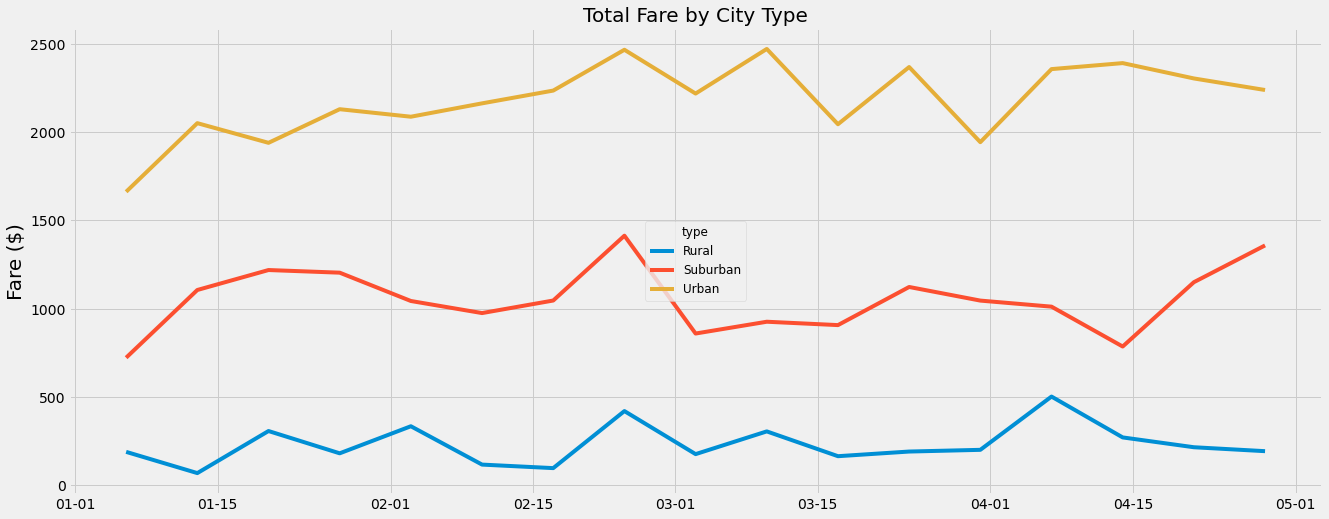

In [188]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import style and mdates from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight
style.use('fivethirtyeight')

# Plot the figure

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_date.Rural, label="Rural")

ax.plot(df_date.Suburban, label="Suburban")

ax.plot(df_date.Urban, label="Urban")

# Incorporate the other graph properties
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($)", fontsize=20)
plt.xticks()


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="center", title="type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Implement DateFormatter for better scope of time
date_form = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")

# Show the plot
plt.show()

